---
title: "Statistical Learning"
author: "phonchi"
date: "09/12/2022"
format: 
  html:
    toc: true
    code-line-numbers: true
    code-tools: true
---

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/phonchi/nsysu-math524/blob/master/static_files/presentations/Chapter 2_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/phonchi/nsysu-math524/blob/master/static_files/presentations/Chapter 2_Lab.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>
<br/>

## Basic Commands
Refer to `Numpy` notebook for more detail

In [1]:
# imports and setup
import math
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
import seaborn as sns
%matplotlib inline

pd.set_option('precision', 2) # number precision for pandas
plt.style.use('seaborn-white')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
# vector
x = [1,3,2,5] # do not use this
x = np.array([1, 6, 2]) # use ndarray instead
y = np.array([1, 4, 3])
x.shape, y.shape

((3,), (3,))

In [3]:
# array operations
x + y

array([ 2, 10,  5])

In [4]:
# matrix creation
x = np.array([[1,2],[3,4]]) # row major, do not use np.matrix
x, np.isfortran(x)

(array([[1, 2],
        [3, 4]]), False)

In [5]:
x = np.asfortranarray(np.array(range(1,5)).reshape(2,2)) #do not do this
x, np.isfortran(x) 

(array([[1, 2],
        [3, 4]]), True)

In [6]:
np.array(range(1,5)).reshape(2,2)

array([[1, 2],
       [3, 4]])

In [7]:
np.sqrt(x) # c.f. https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.sqrtm.html

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

In [8]:
print(np.power(x, 2))
print(x**2)

[[ 1  4]
 [ 9 16]]
[[ 1  4]
 [ 9 16]]


In [9]:
# random normal distribution & correlation
x = np.random.randn(50)
y = x + np.random.normal(loc=50, scale=.1, size=50)
pearsonr(x, y)[0]

0.9961062617773434

In [10]:
# random seed and basic statistical functions
np.random.seed(3)
y = np.random.randn(50)
y.mean(), y.var(), np.sqrt(y.var()), y.std()

(-0.2939268200794072,
 0.9969329133079725,
 0.9984652789696657,
 0.9984652789696657)

## Graphics

Here, we review some of the command we have learned using `Seaborn` 

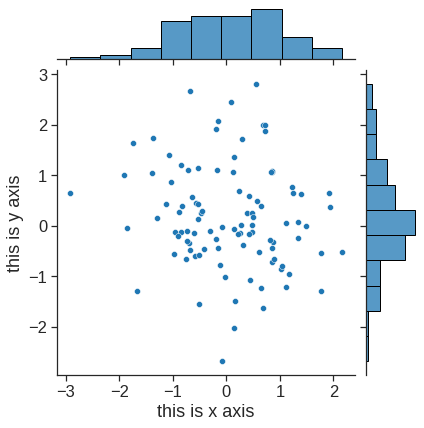

In [11]:
x = np.random.randn(100)
y = np.random.randn(100)

# seaborn scatterplot
p = sns.jointplot(x=x, y=y, kind='scatter')
p.set_axis_labels(xlabel='this is x axis', ylabel='this is y axis')

We will often want to save the output of an `Python` plot. The command that we use to do this will be the `savefig()`.

In [12]:
p.savefig("Figure.pdf") #depends on the file extension
p.savefig("Figure.jpg")

In [13]:
# create a sequence of numbers
x = np.arange(1, 11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [14]:
# linearly spaced numbers
x = np.linspace(-np.pi, np.pi, num=50)
x

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

We  will now create some more sophisticated plots. We create three array here
 
 * A vector of the `x` values (the first dimension),
 * A vector of the `y` values (the second dimension), and
 * An 2D array whose elements correspond to the `z` value (the third dimension) for each pair of (`x`, `y`) coordinates.

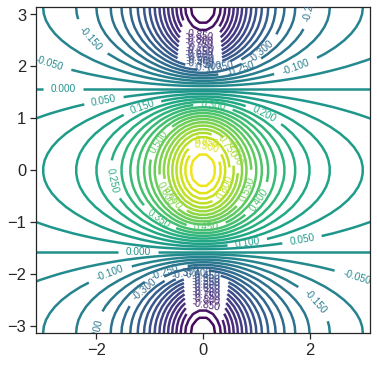

In [15]:
plt.figure(figsize=(6,6))

x = np.linspace(-np.pi, np.pi, num=50)
y = x

# simulating R outer function
def pf(a, b):
    return math.cos(b) / (1 + a**2)

f = np.empty((len(x), len(y)))
 
for i in range(len(x)):
    for j in range(len(y)):
        f[i,j] = pf(x[i], y[j])

        
# contour plot
cp = plt.contour(x, y, f.T, 45, cmap='viridis')
plt.clabel(cp, inline=1, fontsize=10);

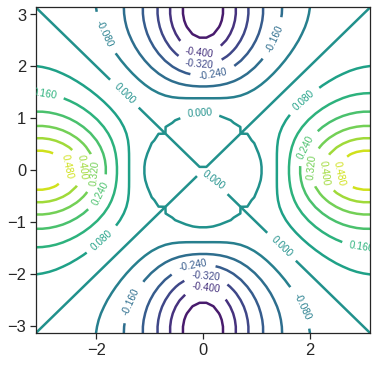

In [16]:
# contour 2
plt.figure(figsize=(6,6))

fa = (f - f.T)/2
cp = plt.contour(x, y, fa.T, 15, cmap='viridis')
plt.clabel(cp, inline=1, fontsize=10);

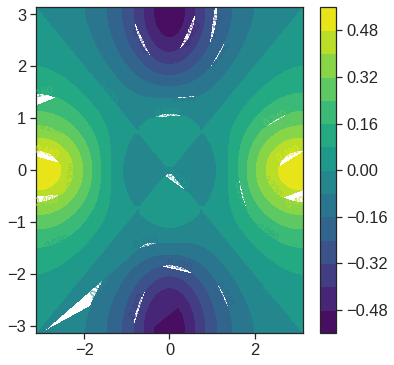

In [17]:
# heatmap
plt.figure(figsize=(6,6))
cp = plt.contourf(x, y, fa.T, 15, cmap='viridis') #adiidtional f
plt.clabel(cp, inline=1, fontsize=10)
plt.colorbar()

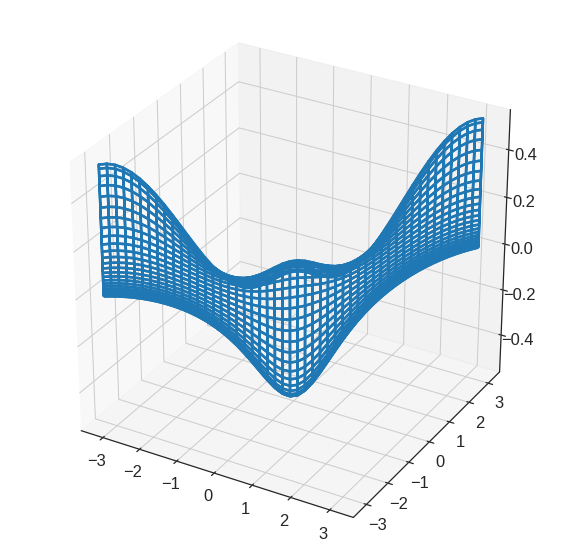

In [18]:
# 3d perspective

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, fa.T, cmap='viridis')

## Indexing Data

In [19]:
# matrix creation (R equivalent of matrix(1:16, 4 ,4))
A = np.arange(16).reshape(4, 4).transpose()
A

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [20]:
A[1, 2]

9

In [21]:
# select a range of rows and columns
A[0:3, 1:4]

array([[ 4,  8, 12],
       [ 5,  9, 13],
       [ 6, 10, 14]])

In [22]:
# select a range of rows and all columns
A[0:2,:]

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13]])

In [23]:
# select all rows and a range of columns
A[:,0:2]

array([[0, 4],
       [1, 5],
       [2, 6],
       [3, 7]])

In [24]:
A[0,:]

array([ 0,  4,  8, 12])

In [25]:
# shape of the matrix
A.shape

(4, 4)

## Loading Data

The data set also includes a number of missing observations, indicated by a question mark `?`. Missing values are a common occurrence in real data sets.

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# read csv data with pandas into dataframe, explicitly setting na_values.
# pandas read_xxx functions infer datatypes, headers, dates, etc. 
# without explicit declarations
Auto = pd.read_csv('/content/drive/MyDrive/Lab/Data/Auto_origin.csv', na_values=['?'])
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [28]:
# dropping rows (axis-0) where there are NA values (inplace)
Auto.dropna(axis=0, inplace=True)
Auto.shape

(392, 9)

In [29]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [30]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [31]:
# get column names of the dataframe
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

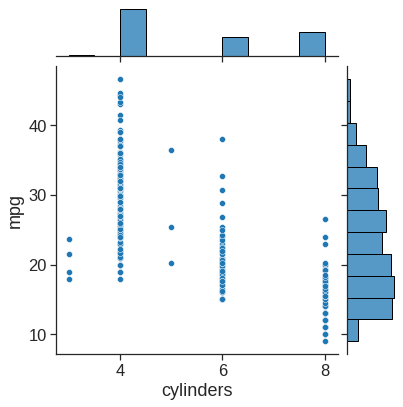

In [32]:
# seaborn scatterplot
pl = sns.jointplot(x='cylinders', y='mpg', data=Auto)

In [33]:
# changing data type of a column into category
Auto['cylinders'] = Auto['cylinders'].astype('category')
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   year          392 non-null    int64   
 7   origin        392 non-null    int64   
 8   name          392 non-null    object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 36.3+ KB


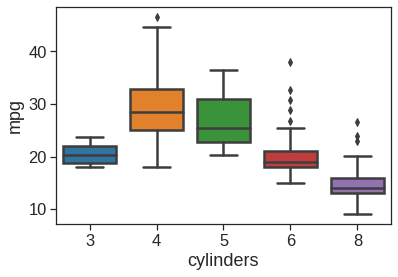

In [34]:
# seaborn boxplot 
sns.boxplot(x='cylinders', y='mpg', data=Auto)

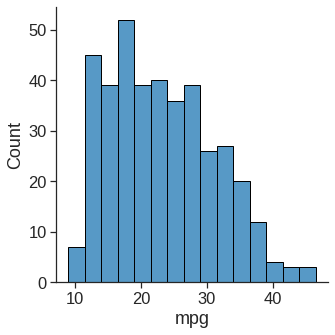

In [35]:
# seaborn displot
sns.displot(x="mpg", data=Auto, bins=15)

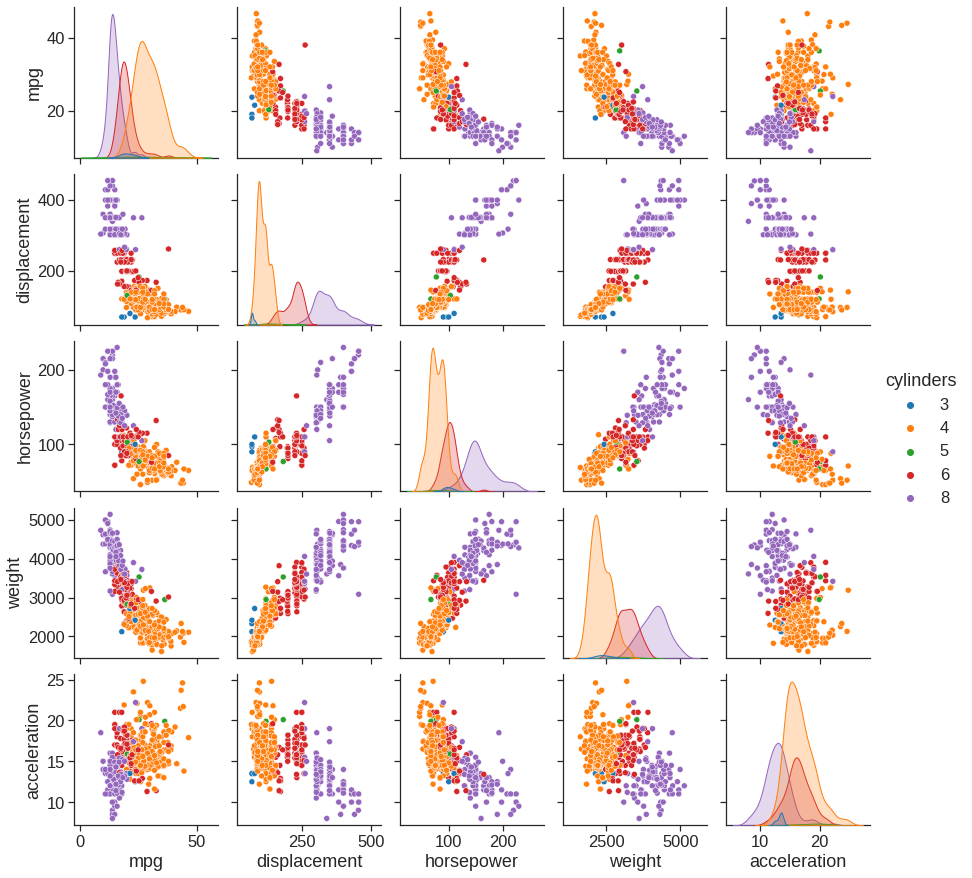

In [36]:
# seaborn pairplot for selected variables, colored by another
sns.pairplot(Auto, vars=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], hue='cylinders')

In [37]:
# summary statistics for all dataframe columns, including non-numerical columns
Auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,392.00,392.0,392.00,392.00,392.00,392.00,392.00,392.00,392
unique,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,amc matador
freq,NaN,199.0,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.45,NaN,194.41,104.47,2977.58,15.54,75.98,1.58,NaN
std,7.81,NaN,104.64,38.49,849.40,2.76,3.68,0.81,NaN
min,9.00,NaN,68.00,46.00,1613.00,8.00,70.00,1.00,NaN
25%,17.00,NaN,105.00,75.00,2225.25,13.78,73.00,1.00,NaN
50%,22.75,NaN,151.00,93.50,2803.50,15.50,76.00,1.00,NaN
75%,29.00,NaN,275.75,126.00,3614.75,17.02,79.00,2.00,NaN


In [38]:
# summary statistics for a single column and wrapped as dataframe for pretty table display in jupyter
pd.DataFrame(Auto['mpg'].describe())

,mpg
count,392.00
mean,23.45
std,7.81
min,9.00
25%,17.00
50%,22.75
75%,29.00
max,46.60


## KNN example

The following code is modified from https://github.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks

1. Generates 10 means $m_k$ from a bivariate Gaussian distrubition for each color:
   - $N((1, 0)^T, \textbf{I})$ for <span style="color: blue">BLUE</span>
   - $N((0, 1)^T, \textbf{I})$ for <span style="color: orange">ORANGE</span>
2. For each color generates 100 observations as following:
   - For each observation it picks $m_k$ at random with probability 1/10.
   - Then generates a $N(m_k,\textbf{I}/5)$

In [39]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture._gaussian_mixture import _compute_precision_cholesky
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [40]:
# load training data that was used in the book
df = pd.read_csv("/content/drive/MyDrive/Lab/Data/mixture.txt")
X_train = df[['x1', 'x2']].values
y_train = df.y.values

# set the known BLUE and ORANGE clusters means
blue_means = np.array([[-0.25343316, 1.7414788], [0.26669318, 0.3712341],
                       [2.09646921, 1.2333642], [-0.06127272, -0.2086791],
                       [2.70354085, 0.5968283], [2.37721198, -1.1864147],
                       [1.05690759, -0.6838939], [0.57888354, -0.0683458],
                       [0.62425213, 0.5987384], [1.67335495, -0.2893159]])
orange_means = np.array([[1.19936869, 0.2484086], [-0.30256110, 0.9454190],
                         [0.05727232, 2.4197271], [1.32932203, 0.8192260],
                         [-0.07938424, 1.6138017], [3.50792673, 1.0529863],
                         [1.61392290, 0.6717378], [1.00753570, 1.3683071],
                         [-0.45462141, 1.0860697], [-1.79801805, 1.9297806]])
all_means = np.vstack((blue_means, orange_means))

gaussian_mixture_model = GaussianMixture(
    n_components=20,
    covariance_type='spherical',
    means_init=all_means,
    random_state=1
).fit(all_means)
# set known covariances
gaussian_mixture_model.covariances_ = [1/5]*20
# it looks like a hack, but GaussianMixture uses precisions_cholesky_
# for predict_proba method. Because we changed covariances_ we need
# to recalculate precisions_cholesky_ too.
gaussian_mixture_model.precisions_cholesky_ = _compute_precision_cholesky(
    gaussian_mixture_model.covariances_,
    gaussian_mixture_model.covariance_type)

# sample 10,000 points for testing
X_test, y_test = gaussian_mixture_model.sample(10000)
# y_test contains sampled component indices
# index < 10 means that the class is BLUE (0)
y_test = 1*(y_test >= 10)

In [41]:
def optimal_bayes_predict(X):
    components_proba = gaussian_mixture_model.predict_proba(X)
    # first 10 components are BLUE(0), and others are BROWN(1)
    blue_proba = np.sum(components_proba[:, :10], axis=1)
    brown_proba = np.sum(components_proba[:, 10:], axis=1)
    y_hat = 1*(blue_proba < brown_proba)
    return y_hat

In [42]:
bayes_error_rate = 1 - accuracy_score(y_train, optimal_bayes_predict(X_train))
print(f'The optimal Bayes error rate = {bayes_error_rate}')

The optimal Bayes error rate = 0.15000000000000002


In [43]:
bayes_error_rate = 1 - accuracy_score(y_test, optimal_bayes_predict(X_test))
print(f'The optimal Bayes error rate = {bayes_error_rate}')

The optimal Bayes error rate = 0.2148


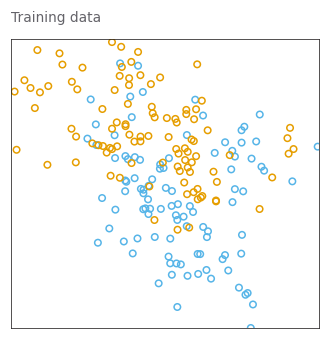

In [44]:
# define commonly used colors
GRAY1, GRAY4, PURPLE = '#231F20', '#646369', '#A020F0'
BLUE, ORANGE, BLUE1 = '#57B5E8', '#E69E00', '#174A7E'

# configure all plots font family and border line widths
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5

# prepares a plot with a title and circles representing training data
def plot_train_data(title):
    fig, ax = plt.subplots(figsize=(2.8, 2.8), dpi=110)
    ax.set_aspect(1.3)
    ax.scatter(X_train[:, 0], X_train[:, 1], s=18, facecolors='none',
               edgecolors=np.array([BLUE, ORANGE])[y_train])
    ax.tick_params(
        bottom=False, left=False, labelleft=False, labelbottom=False)
    ax.set_xlim(-2.6, 4.2)
    ax.set_ylim(-2.0, 2.9)
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    ax.text(-2.6, 3.2, title, color=GRAY4, fontsize=9)
    for spine in ax.spines.values():
        spine.set_color(GRAY1)
    return fig, ax

# test it
_, _ = plot_train_data('Training data')

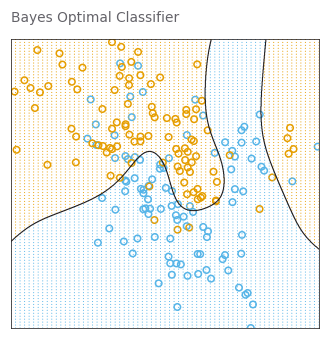

In [45]:
# given a model prediction function computes X points on n x n grid and the
# corresponding predicted classes
def fill_prediction_grid(n1, n2, predict):
    x1, x2 = np.linspace(-2.6, 4.2, n1), np.linspace(-2.0, 2.9, n2)
    X = np.transpose([np.tile(x1, n2), np.repeat(x2, n1)])
    y = predict(X)
    return X, y


# given a model prediction function computes X0 and X1 n x n meshgrids
# and the corresponing predicted classes meshgrid
def fill_prediction_meshgrid(predict):
    n1, n2 = 1000, 1000
    X, y = fill_prediction_grid(n1, n2, predict)
    return X[:, 0].reshape(n1, n2), X[:, 1].reshape(n1, n2), y.reshape(n1, n2)


# given a model prediction function plots train data, model decision
# bounary and background dots
def plot_model(predict, title):
    fig, ax = plot_train_data(title)
    # plot background dots
    X, y = fill_prediction_grid(69, 99, predict)
    ax.scatter(X[:, 0], X[:, 1], marker='.', lw=0, s=2,
               c=np.array([BLUE, ORANGE])[y])
    # plot the decision boundary
    X0, X1, Y = fill_prediction_meshgrid(predict)
    ax.contour(X0, X1, Y, [0.5], colors=GRAY1, linewidths=[0.7])
    return fig, ax

# plot the optimal Bayes decision boundary
_, _ = plot_model(optimal_bayes_predict, 'Bayes Optimal Classifier')

In [46]:
# lets save Bayes meshgrids for optimal decision boundary plotting
X0_bayes, X1_bayes, Y_bayes = fill_prediction_meshgrid(optimal_bayes_predict)


# given a model prediction function plots performance statistics
def plot_model_stat(predict, title):
    fig, ax = plot_model(predict, title)
    ax.contour(X0_bayes, X1_bayes, Y_bayes, [0.5], colors='purple',
               linewidths=[0.5], linestyles='dashed')
    test_error_rate = 1 - accuracy_score(y_test, predict(X_test))
    train_error_rate = 1 - accuracy_score(y_train, predict(X_train))
    parms = {'color': GRAY1, 'fontsize': 7,
             'bbox': {'facecolor': 'white', 'pad': 3, 'edgecolor': 'none'}}
    ax.text(-2.42, -1.35, f'Training Error: {train_error_rate:.3f}', **parms)
    ax.text(-2.42, -1.62, f'Test Error:       {test_error_rate:.3f}', **parms)
    ax.text(-2.42, -1.89, f'Bayes Error:    {bayes_error_rate:.3f}', **parms)
    return fig, ax

In [47]:
# Run GridSearchCV to find the best n_neighbors parameter using the 10-folds
# CV. It finds 12, but the book uses 15-Nearest Neighbor Classifier because
# the authors selected the most parsimonious model within one standard error
# from the best model (one standard error rule). We will apply this rule in
# other examples, not here.
k_neighbors_grid_search = GridSearchCV(
    KNeighborsClassifier(),
    {'n_neighbors': list(range(1, 50))},
    cv=10
).fit(X_train, y_train)
k_neighbors_grid_search.best_params_

{'n_neighbors': 12}

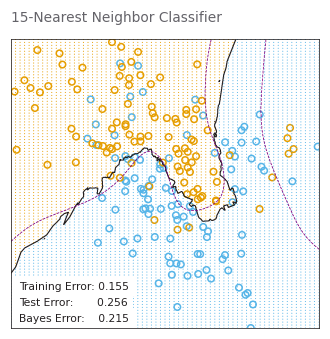

In [48]:
# PAGE 14. Use 15-nearest-neighbor averaging of the binary coded response as
#          the method of fitting. Thus Y-hat is the proportion of ORANGE’s in
#          the neighborhood, and so assigning class ORANGE to G-hat if
#          Y-hat>0.5 amounts to a majority vote in the neighborhood.
neighbors15_classifier = KNeighborsClassifier(
    n_neighbors=15
).fit(X_train, y_train)
_, _ = plot_model_stat(
    neighbors15_classifier.predict, '15-Nearest Neighbor Classifier')

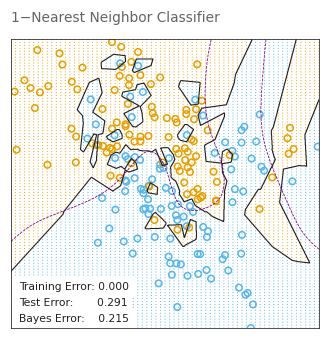

In [49]:
# PAGE 16. The classes are coded as a binary variable (BLUE = 0,ORANGE = 1),
#          and then predicted by 1-nearest-neighbor classiﬁcation.
neighbors1_classifier = KNeighborsClassifier(
    n_neighbors=1
).fit(X_train, y_train)
_, _ = plot_model_stat(
    neighbors1_classifier.predict, '1−Nearest Neighbor Classifier')

In [50]:
n_neighbors_vals = list(range(1, 30, 2))
k_neighbors_grid_search = GridSearchCV(
    KNeighborsClassifier(),
    {'n_neighbors': n_neighbors_vals},
    cv=10, scoring='accuracy',
    return_train_score=True
).fit(X_train, y_train)

train_errors, test_errors = [], []
for k in n_neighbors_vals:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    train_errors.append(1 - clf.score(X_train, y_train))
    test_errors.append(1 - clf.score(X_test, y_test))

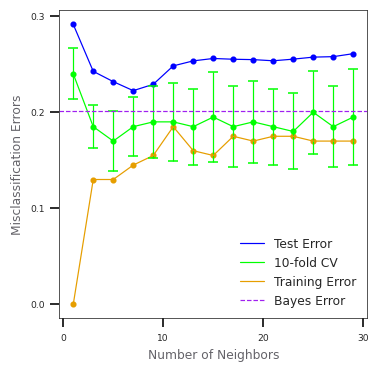

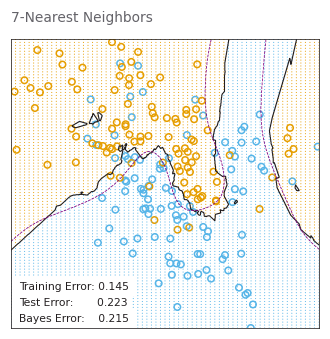

In [51]:
# PAGE 467. k-nearest-neighbors on the two-class mixture data. The upper
#           panel shows the misclassification errors as a function of
#           neighborhood size. Standard error bars are included for 10-fold
#           cross validation. The lower panel shows the decision boundary
#           for 7-nearest-neighbors, which appears to be optimal for minimizing
#           test error.
cv_erros = 1 - np.vstack([
    k_neighbors_grid_search.cv_results_[f'split{i}_test_score']
    for i in range(10)]).T
cv_mean_errors = np.mean(cv_erros, axis=1)
cv_std_errors = np.std(cv_erros, ddof=1, axis=1)/np.sqrt(10)
best_index = np.argmin(cv_mean_errors)
best_err, best_std_err = cv_mean_errors[best_index], cv_std_errors[best_index]

fig, ax = plt.subplots(figsize=(2.8, 2.8), dpi=110)
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
ax.scatter(n_neighbors_vals, test_errors, c='#0000FF', s=9)
ax.plot(n_neighbors_vals, test_errors, c='#0000FF', linewidth=0.8,
        label='Test Error')
ax.plot(n_neighbors_vals, cv_mean_errors, c='#00FF00', linewidth=0.8,
        label='10-fold CV')
ax.scatter(n_neighbors_vals, train_errors, c=ORANGE, s=9)
ax.plot(n_neighbors_vals, train_errors, c=ORANGE, linewidth=0.8,
        label='Training Error')

ax.errorbar(n_neighbors_vals, cv_mean_errors,
            color='#00FF00', linestyle='None', marker='o', elinewidth=0.8,
            markersize=3, yerr=cv_std_errors, ecolor='#00FF00', capsize=3)
ax.axhline(y=best_err+best_std_err, c=PURPLE, linewidth=0.8, linestyle='--',
           label='Bayes Error')
for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(6)
ax.set_xlabel('Number of Neighbors', color=GRAY4, fontsize=8)
ax.set_ylabel('Misclassification Errors', color=GRAY4, fontsize=8)

neighbors7_classifier = KNeighborsClassifier(
    n_neighbors=7).fit(X_train, y_train)
plot_model_stat(neighbors7_classifier.predict, '7-Nearest Neighbors')
_ = ax.legend(loc='best', prop={'size': 8})

## References

[1] [https://web.stanford.edu/~hastie/ElemStatLearn/](https://web.stanford.edu/~hastie/ElemStatLearn/)

[2] [https://github.com/emredjan/ISL-python](https://github.com/emredjan/ISL-python)

[3] [https://github.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks](https://github.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks)